# Sheet 3 - Simulation Exercise (Probit Model - Gibbs and M-H)

In [202]:
using Distributions, StatsPlots, Plots, StatsBase, LinearAlgebra, GraphRecipes
using GaussianMixtures
using LaTeXStrings
pyplot()

┌ Info: Precompiling GraphRecipes [bd48cda9-67a9-57be-86fa-5b3c104eda73]
└ @ Base loading.jl:1192


Plots.PyPlotBackend()

In the probit model we have the similar situation that we have for the linear regression,
hence:
$$
Y = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n
$$
But $Y = 0$ or $1$, so we have to transform the linear equation to fall between 0 and 1.
To do that, we use the cdf for the normal distribution.
$$
Y = \phi(\beta_0 + \beta_1 x_1 + ... + \beta_n x_n)
$$
Note that the cdf will guarantee a value between 0 and 1.

1. Generate a synthetic dataset Y from the probit model for an arbitrary value of β and a matrix X.

In [358]:
n    = 50
beta = [1.0 5.0]
X    = randn(n,2)
# cdf.(Normal(0,1),X)
# X' * beta
Y = (cdf.(Normal(0,1),X*beta') .>= 0.5).*1;
C = countmap(Y[:])

Dict{Int64,Int64} with 2 entries:
  0 => 21
  1 => 29

2. Introduce the prior distribution on β:
$$\pi(\beta) = N (0, B)$$
for a p × p covariance matrix B. Write a function taking a vector β as argument and returning the log
posterior density function evaluated at β.

Note that
$$
p(\beta \mid Y) \propto \pi(\beta)\prod^n_{i=1}\phi(X_i^T\beta)^{y_i}(1-\phi X_i^T \beta)^{1-y_i}
$$


In [359]:
B = [2.0 0;
     0 2.0]
logpdf(MvNormal(B),[1.0,0]) #Note that Julia requires B to be of real numbers, not integers

-2.7810242469692907

In [362]:
fu
Y'*logcdf.(Normal(0,1),X*beta') + (1 .- Y)'* logcdf.(Normal(0,1),-X*beta') .+ logpdf(MvNormal(B),beta)
# (1 .- Y)'* log.(1 .- cdf.(Normal(0,1),X*beta')) # Problems with summation, going to infinity

# function LogPosterior(beta)
#     logpdf(Normal(0,1),)
# end

1×1 Array{Float64,2}:
 -8.10150743664019

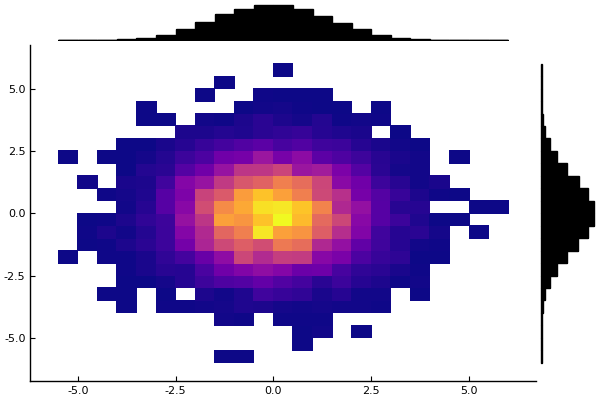

In [320]:
# plot(v[1,:],v[2,:],seriestype=:scatter,markerstrokewidth=0,alpha=0.1,)
marginalhist(v[1,:],v[2,:],seriescolor=:plasma)#seriescolor=:blues,

In [165]:
v[1]

2-element Array{Float64,1}:
 -0.9431135860999073
  1.5616872729334161